In [13]:
# Plot the verification against ERA5:
# Plot bias/rmse in 2D map (lat-lon) and zonal mean plot
# initial built: 2024/09/23

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.21.1


In [14]:
datahome    = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/GribDiag/ush/plotgribnc/data/gribnc'

timerange = '2022061500_2022072000_12'
expname   = 'ctrl-ctrl_noinf-only_clr_clr-clr_and_cld_0.05-clr_and_cld_0.05_sym-clr_and_cld_0.05_model-clr_and_cld_0.05_obs'
exps = expname.split('-')
exp_list=['ctrl']

ncdir = f'{datahome}/ERA5/{timerange}/{expname}'

In [15]:
# read netcdfs:
rmse_q = {}; rmse_t={}; rmse_c={};
bias_q = {}; bias_t={}; bias_c={};

for exp in exps:  
    fn_rmse = nc.Dataset(f"{ncdir}/rmse_{exp}_f06.nc")
    lat = fn_rmse.variables['latitude'][:]
    lon = fn_rmse.variables['longitude'][:]
    lev = fn_rmse.variables['level'][:]
    rmse_q[exp] = fn_rmse.variables['q'][:]
    rmse_t[exp] = fn_rmse.variables['t'][:]
    rmse_c[exp] = fn_rmse.variables['clwmr'][:]

    fn_bias = nc.Dataset(f"{ncdir}/bias_{exp}_f06.nc")
    bias_q[exp] = fn_bias.variables['q'][:]
    bias_t[exp] = fn_bias.variables['t'][:]
    bias_c[exp] = fn_bias.variables['clwmr'][:]

In [6]:
lev

masked_array(data=[ 100,  150,  200,  250,  300,  350,  400,  450,  500,
                    550,  600,  650,  700,  750,  800,  825,  850,  875,
                    900,  925,  950,  975, 1000],
             mask=False,
       fill_value=999999,
            dtype=int32)

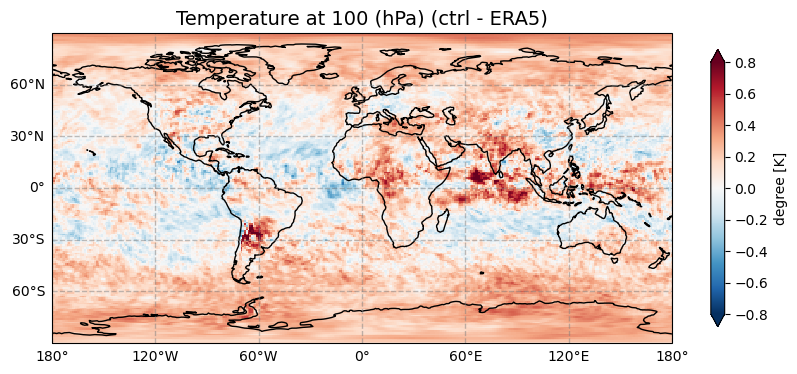

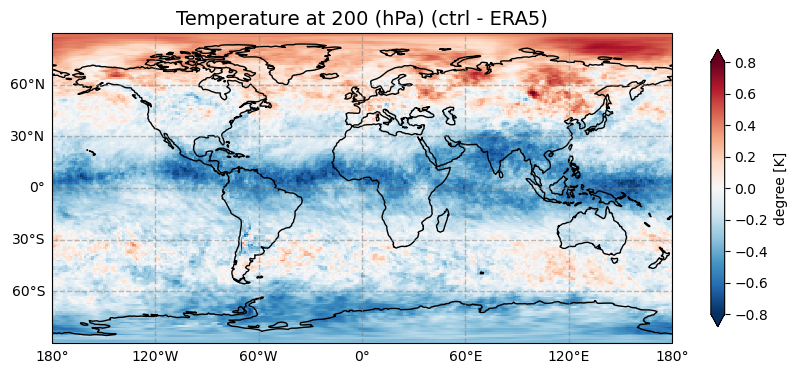

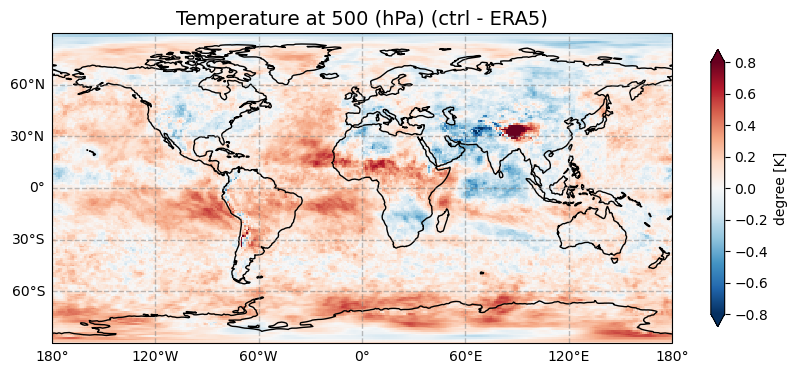

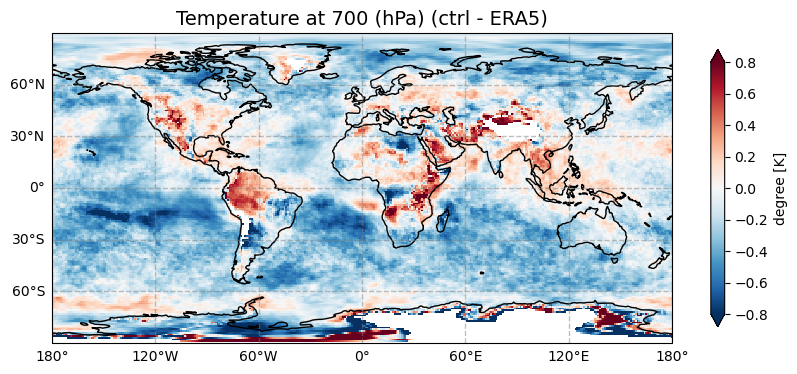

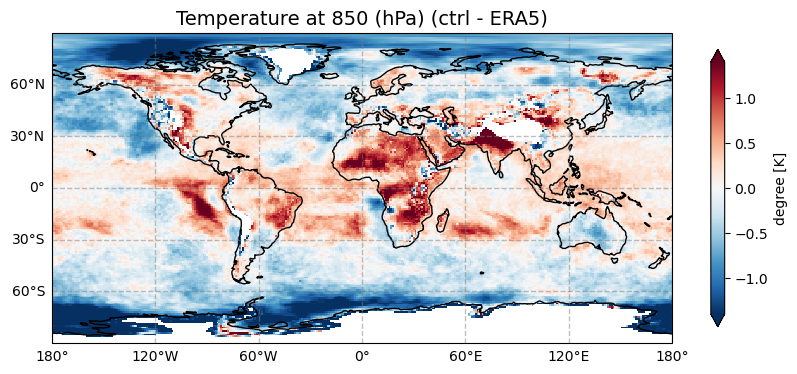

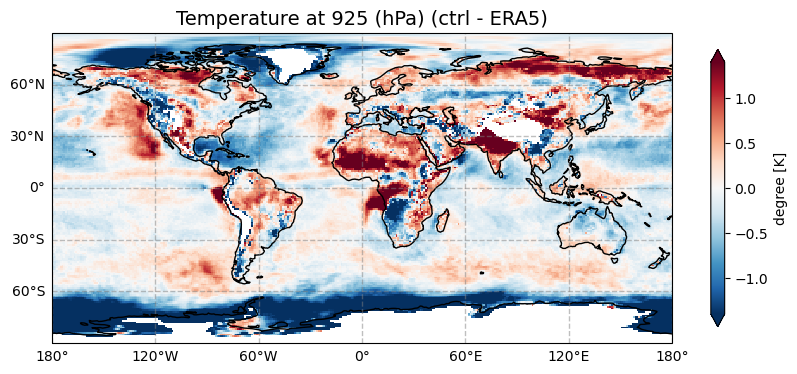

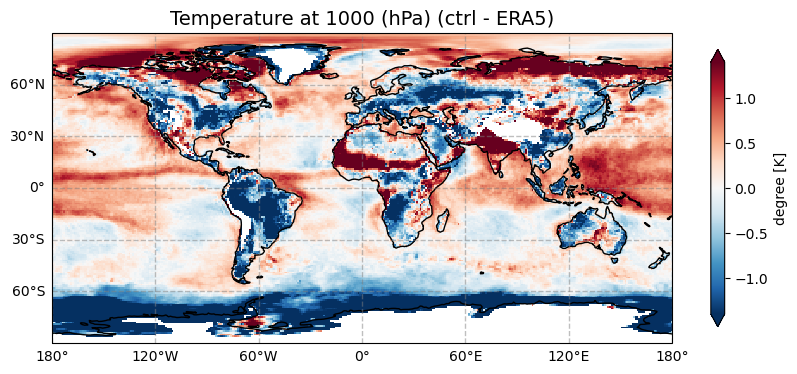

In [7]:
# plot 2D map Temperature bias (exp - reanalysis) for specified levels:

plt_height = [100., 200., 500., 700., 850., 925., 1000.]
#plt_height = [1000.]
plt_height_idx = np.where(np.isin(lev, plt_height))

lats, lons = np.meshgrid(lat, lon)

for h_idx in plt_height_idx[0]:
    for exp in exp_list:
        if lev[h_idx] <= 700:
            vmax_norm =  0.8
            vmin_norm = -0.8
        else:
            vmax_norm =  1.4
            vmin_norm = -1.4            
        
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,6))
        ax.coastlines()
        plt_vars = np.squeeze(bias_t[exp][h_idx,:,:].transpose())
        contour  = ax.pcolormesh(lons, lats, plt_vars, cmap='RdBu_r', vmin=vmin_norm, vmax=vmax_norm)
        ax.set_title(f'Temperature at {lev[h_idx]} (hPa) ({exp} - ERA5)', fontsize=14)
        gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False  # Hide labels on the top side
        gl.right_labels = False  # Hide labels on the right side    

        # set colorbar
        cbar = plt.colorbar(contour, ax=ax, extend='both', orientation='vertical', shrink=0.6) # Adjust the shrink parameter as needed
        cbar.set_label('degree [K]')
        plt.savefig(f"ERA5_2dmap_{lev[h_idx]}_rmse_T_{exp}.png")
        plt.show()


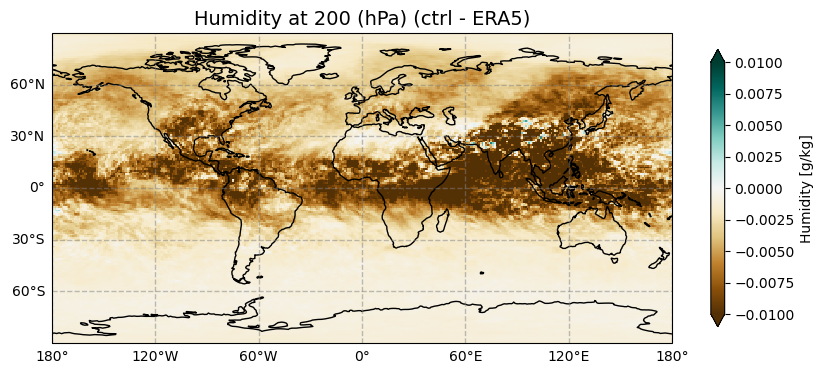

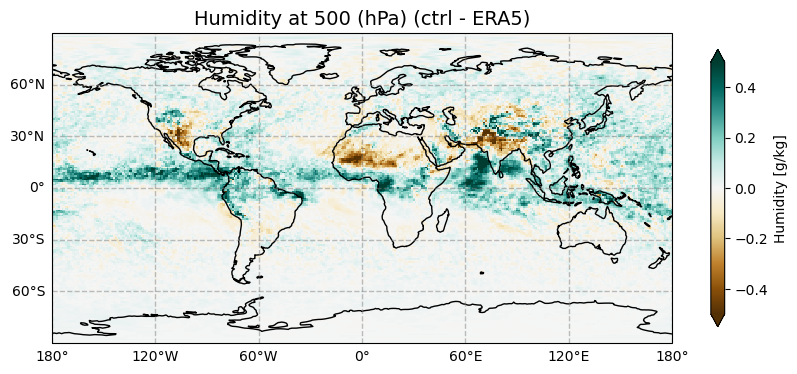

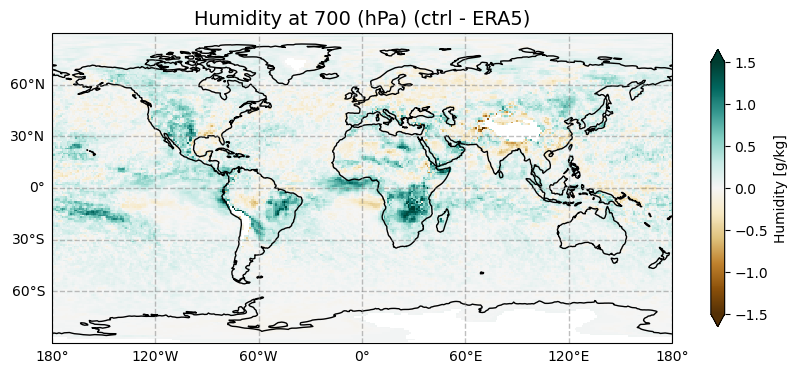

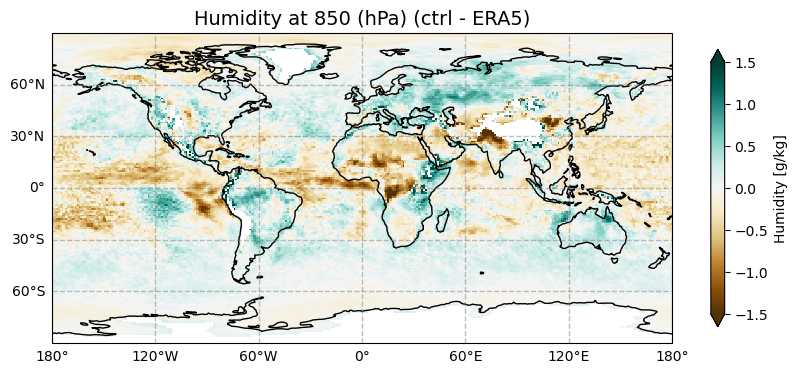

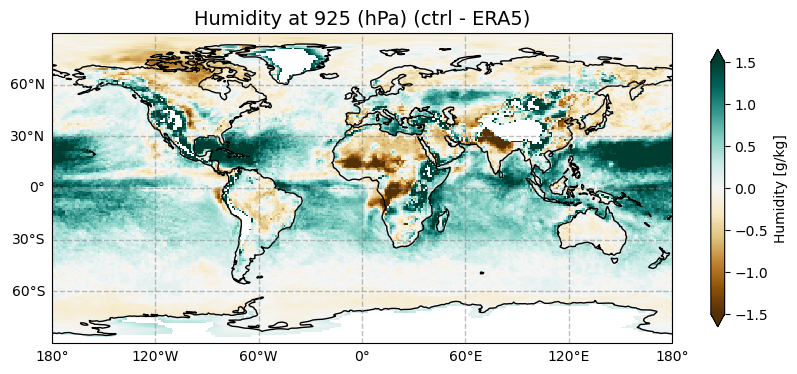

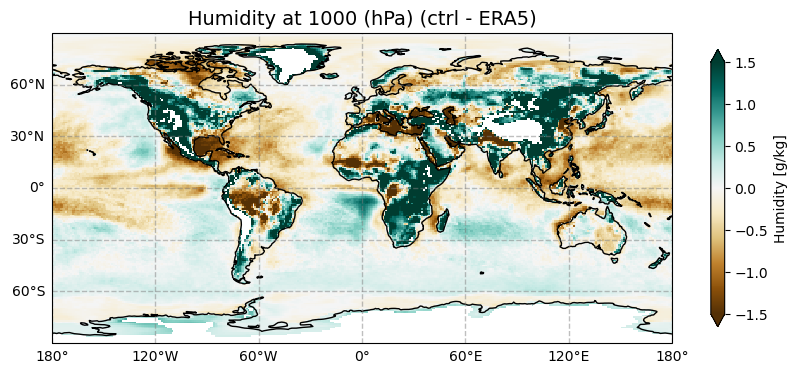

In [16]:
# plot 2D map Humidity bias (exp - reanalysis) for specified levels:

plt_height = [200., 500., 700., 850., 925., 1000.]
#plt_height = [1000.]
plt_height_idx = np.where(np.isin(lev, plt_height))

lats, lons = np.meshgrid(lat, lon)

for h_idx in plt_height_idx[0]:
    for exp in exp_list:
        if lev[h_idx] <= 200:
            vmax_norm =  0.01
            vmin_norm = -0.01
        elif lev[h_idx] > 200 and lev[h_idx] <=500 :
            vmax_norm =  0.5
            vmin_norm = -0.5
        else:
            vmax_norm =  1.5
            vmin_norm = -1.5          
        
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,6))
        ax.coastlines()
        plt_vars = np.squeeze(bias_q[exp][h_idx,:,:].transpose())*1e3
        contour  = ax.pcolormesh(lons, lats, plt_vars, cmap='BrBG', vmin=vmin_norm, vmax=vmax_norm)
        ax.set_title(f'Humidity at {lev[h_idx]} (hPa) ({exp} - ERA5)', fontsize=14)
        gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False  # Hide labels on the top side
        gl.right_labels = False  # Hide labels on the right side    

        # set colorbar
        cbar = plt.colorbar(contour, ax=ax, extend='both', orientation='vertical', shrink=0.6) # Adjust the shrink parameter as needed
        cbar.set_label('Humidity [g/kg]')
        plt.savefig(f"ERA5_2dmap_{lev[h_idx]}_rmse_Q_{exp}.png")
        plt.show()


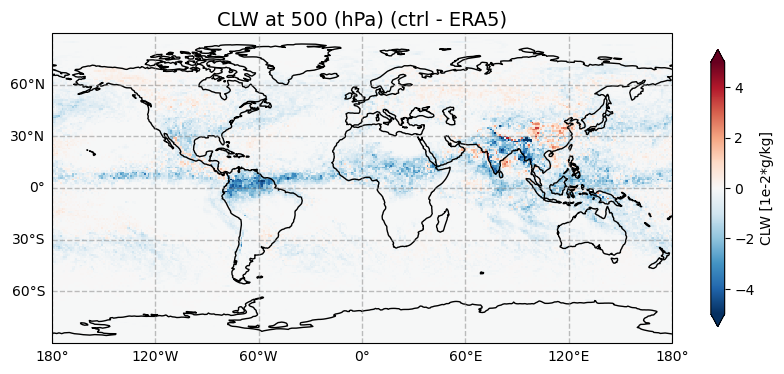

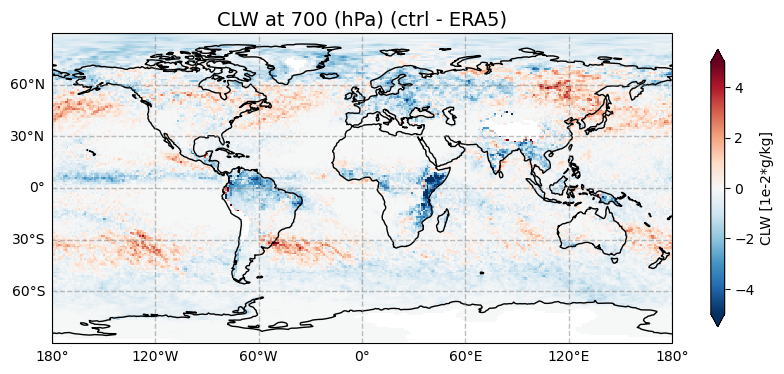

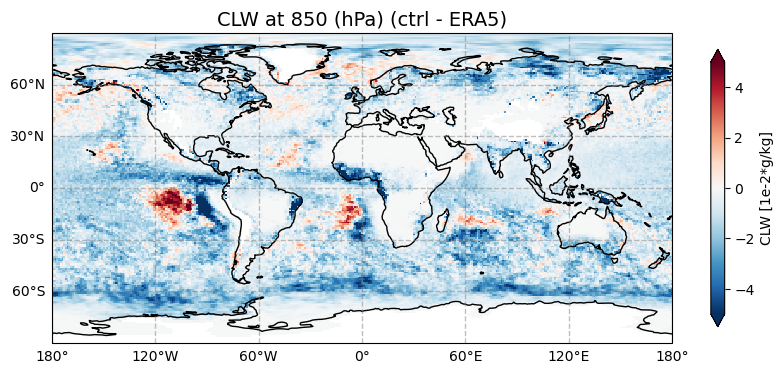

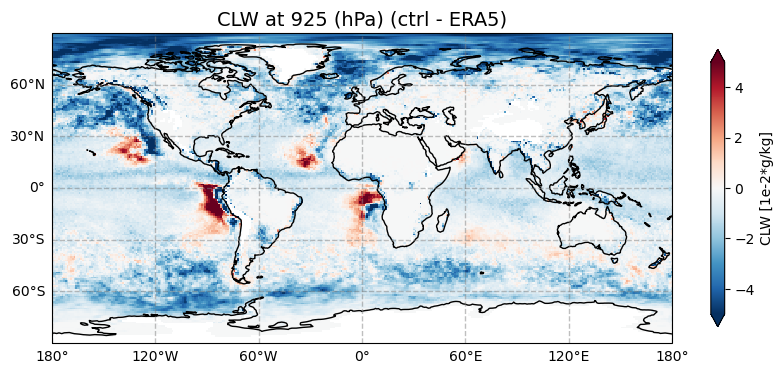

In [9]:
# plot 2D map cloud liquid water bias (exp - reanalysis) for specified levels:

plt_height = [500., 700., 850., 925.]
#plt_height = [1000.]
plt_height_idx = np.where(np.isin(lev, plt_height))

lats, lons = np.meshgrid(lat, lon)

for h_idx in plt_height_idx[0]:
    for exp in exp_list:
        '''
        if lev[h_idx] <= 200:
            vmax_norm =  1
            vmin_norm = -1
        elif lev[h_idx] > 200 and lev[h_idx] <=500 :
            vmax_norm =  0.5
            vmin_norm = -0.5
        else:
            vmax_norm =  1.5
            vmin_norm = -1.5          
        '''
        vmin_norm = -5
        vmax_norm =  5
        
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,6))
        ax.coastlines()
        plt_vars = np.squeeze(bias_c[exp][h_idx,:,:].transpose())*1e5
        contour  = ax.pcolormesh(lons, lats, plt_vars, cmap='RdBu_r', vmin=vmin_norm, vmax=vmax_norm)
        ax.set_title(f'CLW at {lev[h_idx]} (hPa) ({exp} - ERA5)', fontsize=14)
        gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False  # Hide labels on the top side
        gl.right_labels = False  # Hide labels on the right side    

        # set colorbar
        cbar = plt.colorbar(contour, ax=ax, extend='both', orientation='vertical', shrink=0.6) # Adjust the shrink parameter as needed
        cbar.set_label('CLW [1e-2*g/kg]')
        
        plt.savefig(f"ERA5_2dmap_{lev[h_idx]}_rmse_RH_{exp}.png")
        plt.show()


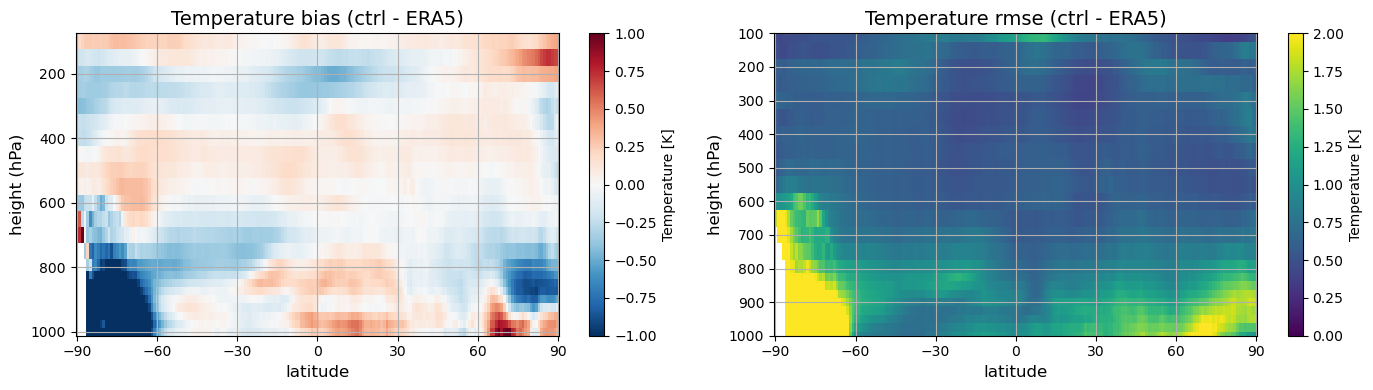

In [10]:
# zonal mean plot Temperature bias and rmse (exp - reanalysis):

lats, levs = np.meshgrid(lat, lev)

zbias_t = {};
zrmse_t = {};
for exp in exps:
    zbias_t[exp] = np.mean(bias_t[exp], axis=2)
    zrmse_t[exp] = np.mean(rmse_t[exp], axis=2)

vmin_norm = -1
vmax_norm =  1
vmax_rmse =  2

for exp in exp_list:
    # figure size:
    fig = plt.figure(figsize=(14,4))

    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

    # ax1: 
    contour1=ax1.pcolormesh(lats, levs, zbias_t[exp], cmap='RdBu_r', vmin=vmin_norm, vmax=vmax_norm)
    ax1.invert_yaxis()
    ax1.set_xlabel('latitude',fontsize=12)
    ax1.set_xticks([-90,-60,-30,0,30,60,90])
    ax1.set_ylabel('height (hPa)',fontsize=12)
    ax1.set_title(f'Temperature bias ({exp} - ERA5)', fontsize=14)
    ax1.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour1,location='right',aspect=20)
    cbar.set_label('Temperature [K]')

    # ax2: 
    contour2 = ax2.pcolormesh(lats, levs, zrmse_t[exp], cmap='viridis', vmin=0, vmax=vmax_rmse)
    ax2.invert_yaxis()
    ax2.set_xlabel('latitude',fontsize=12)
    ax2.set_xticks([-90,-60,-30,0,30,60,90])
    ax2.set_ylabel('height (hPa)',fontsize=12)
    ax2.set_title(f'Temperature rmse ({exp} - ERA5)', fontsize=14)
    ax2.set_ylim(1000,100)
    ax2.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour2,location='right',aspect=20)
    cbar.set_label('Temperature [K]')
    
    plt.tight_layout()
    plt.savefig(f"ERA5_zonal_rmse_bias_T_{exp}.png")
    plt.show()


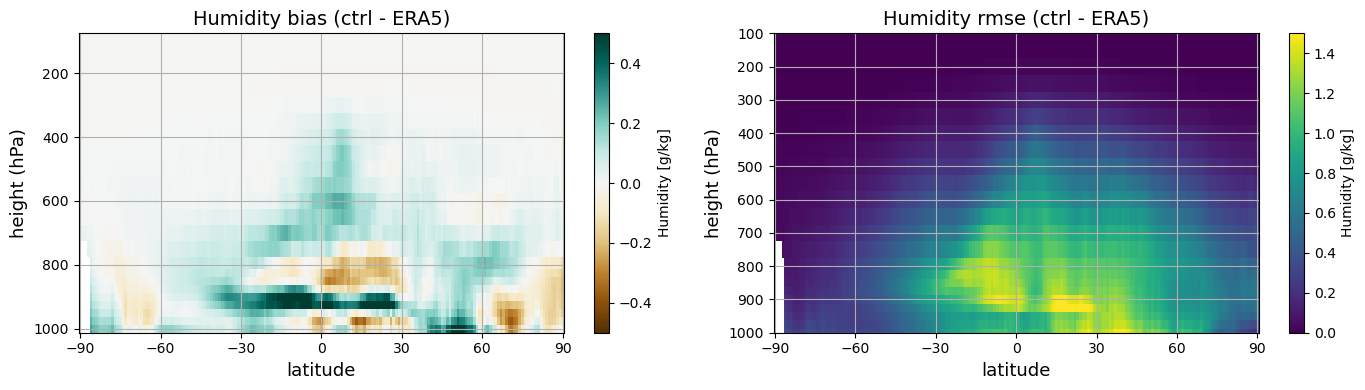

In [17]:
# zonal mean plot Humidity bias and rmse (exp - reanalysis):

lats, levs = np.meshgrid(lat, lev)

zbias_q = {};
zrmse_q = {};
for exp in exps:
    zbias_q[exp] = np.mean(bias_q[exp], axis=2)
    zrmse_q[exp] = np.mean(rmse_q[exp], axis=2)

vmin_norm = -0.5
vmax_norm =  0.5
vmax_rmse =  1.5

for exp in exp_list:
    # figure size:
    fig = plt.figure(figsize=(14,4))

    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

    # ax1: 
    contour1=ax1.pcolormesh(lats, levs, zbias_q[exp]*1e3, cmap='BrBG', vmin=vmin_norm, vmax=vmax_norm)
    ax1.invert_yaxis()
    ax1.set_xlabel('latitude',fontsize=13)
    ax1.set_xticks([-90,-60,-30,0,30,60,90])
    ax1.set_ylabel('height (hPa)',fontsize=13)
    ax1.set_title(f'Humidity bias ({exp} - ERA5)', fontsize=14)
    ax1.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour1,location='right',aspect=20)
    cbar.set_label('Humidity [g/kg]')

    # ax2: 
    contour2 = ax2.pcolormesh(lats, levs, zrmse_q[exp]*1e3, cmap='viridis', vmin=0, vmax=vmax_rmse)
    ax2.invert_yaxis()
    ax2.set_xlabel('latitude',fontsize=13)
    ax2.set_xticks([-90,-60,-30,0,30,60,90])
    ax2.set_ylabel('height (hPa)',fontsize=13)
    ax2.set_title(f'Humidity rmse ({exp} - ERA5)', fontsize=14)
    ax2.set_ylim(1000,100)
    ax2.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour2,location='right',aspect=20)
    cbar.set_label('Humidity [g/kg]')

    plt.tight_layout()
    plt.savefig(f"ERA5_zonal_rmse_bias_Q_{exp}.png")

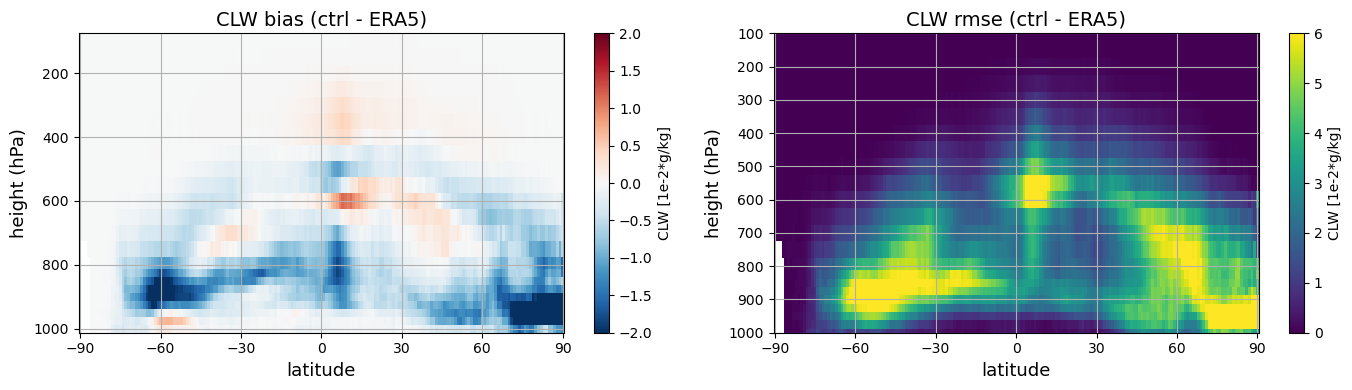

In [12]:
# zonal mean plot CLW bias and rmse (exp - reanalysis):

lats, levs = np.meshgrid(lat, lev)

zbias_c = {};
zrmse_c = {};
for exp in exps:
    zbias_c[exp] = np.mean(bias_c[exp], axis=2)
    zrmse_c[exp] = np.mean(rmse_c[exp], axis=2)

vmin_norm = -2
vmax_norm =  2
vmax_rmse =  6

for exp in exp_list:
    # figure size:
    fig = plt.figure(figsize=(14,4))

    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

    # ax1: 
    contour1=ax1.pcolormesh(lats, levs, zbias_c[exp]*1e5, cmap='RdBu_r', vmin=vmin_norm, vmax=vmax_norm)
    ax1.invert_yaxis()
    ax1.set_xlabel('latitude',fontsize=13)
    ax1.set_xticks([-90,-60,-30,0,30,60,90])
    ax1.set_ylabel('height (hPa)',fontsize=13)
    ax1.set_title(f'CLW bias ({exp} - ERA5)', fontsize=14)
    ax1.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour1,location='right',aspect=20)
    cbar.set_label('CLW [1e-2*g/kg]')

    # ax2: 
    contour2 = ax2.pcolormesh(lats, levs, zrmse_c[exp]*1e5, cmap='viridis', vmin=0, vmax=vmax_rmse)
    ax2.invert_yaxis()
    ax2.set_xlabel('latitude',fontsize=13)
    ax2.set_xticks([-90,-60,-30,0,30,60,90])
    ax2.set_ylabel('height (hPa)',fontsize=13)
    ax2.set_title(f'CLW rmse ({exp} - ERA5)', fontsize=14)
    ax2.set_ylim(1000,100)
    ax2.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour2,location='right',aspect=20)
    cbar.set_label('CLW [1e-2*g/kg]')

    plt.tight_layout()
    plt.savefig(f"ERA5_zonal_rmse_bias_clw_{exp}.png")

In [ ]:
# ERA5 - 2DMAPS-temperature-rmse

plt_height = [100., 200., 500., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, lons = np.meshgrid(lat_era, lon_era)

# 2DMap for selected levels:
val_max = [2.5, 1.5, 1.5, 5.0, 5.0]
val_min = [0.0, 0.0, 0.0, 0.0, 0.0]

# Main Plot section:
for i in range(5):
    # figure size:
    fig = plt.figure(figsize=(16,12))
    
    plt_levs = np.linspace(val_min[i], val_max[i], 11)
    
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())  # Add subplot at position 2

    ax1.coastlines()
    plt_vars = rmse_t_era_ctrl[zz_era[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'rmse ({expref}) Temperature at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    ax2.coastlines()
    plt_vars = rmse_t_era_test[zz_era[0][i],:,:].transpose()
    contour2 = ax2.contourf(lons, lats, plt_vars, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax2.set_xlabel('longitude')
    ax2.set_ylabel('latitude') 
    ax2.set_title(f'rmse ({exptest}) Temperature at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour2, ax=[ax1, ax2], shrink=0.2, location='right')
    cbar.set_label('degree [K]')
    plt.show()

In [ ]:
# ERA5 - 2DMAPS-temperature-bias

plt_height = [100., 200., 500., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, lons = np.meshgrid(lat_era, lon_era)

# 2DMap for selected levels:
val_max = [1.5, 1.5, 1.5, 3.0, 3.0]
val_min = -np.array(val_max)

# Main Plot section:
for i in range(5):
    # figure size:
    fig = plt.figure(figsize=(16,12))
    
    plt_levs = np.linspace(val_min[i], val_max[i], 11)
    
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())  # Add subplot at position 2

    ax1.coastlines()
    plt_vars = bias_t_era_ctrl[zz_era[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, cmap=tmap, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'rmse ({expref}) Temperature at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    ax2.coastlines()
    plt_vars = bias_t_era_test[zz_era[0][i],:,:].transpose()
    contour2 = ax2.contourf(lons, lats, plt_vars, cmap=tmap, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax2.set_xlabel('longitude')
    ax2.set_ylabel('latitude') 
    ax2.set_title(f'rmse ({exptest}) Temperature at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour2, ax=[ax1, ax2], shrink=0.2, location='right')
    cbar.set_label('degree [K]')
    plt.show()

In [ ]:
# ERA5 - 2DMAPS-humidity-rmse

plt_height = [100., 200., 500., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, lons = np.meshgrid(lat_era, lon_era)

# 2DMap for selected levels:
val_max = [0.000004, 0.00008, 0.0015, 0.003, 0.003]
val_min = [0.0, 0.0, 0.0, 0.0, 0.0]

# Main Plot section:
for i in range(5):
    # figure size:
    fig = plt.figure(figsize=(16,12))
    
    plt_levs = np.linspace(val_min[i], val_max[i], 11)
    
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())  # Add subplot at position 2

    ax1.coastlines()
    plt_vars = rmse_q_era_ctrl[zz_era[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'rmse ({expref}) Humidity at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    ax2.coastlines()
    plt_vars = rmse_q_era_test[zz_era[0][i],:,:].transpose()
    contour2 = ax2.contourf(lons, lats, plt_vars, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax2.set_xlabel('longitude')
    ax2.set_ylabel('latitude') 
    ax2.set_title(f'rmse ({exptest}) Humidity at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour2, ax=[ax1, ax2], shrink=0.2, location='right')
    cbar.set_label('mixing ratio [kg/kg]')
    plt.show()

In [ ]:
# ERA5 - 2DMAPS-humidity-bias

plt_height = [100., 200., 500., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, lons = np.meshgrid(lat_era, lon_era)

# 2DMap for selected levels:
val_max = [0.000003, 0.00003, 0.0007, 0.0018, 0.0025]
val_min = -np.array(val_max)

# Main Plot section:
for i in range(5):
    # figure size:
    fig = plt.figure(figsize=(16,12))
    
    plt_levs = np.linspace(val_min[i], val_max[i], 11)
    
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())  # Add subplot at position 2

    ax1.coastlines()
    plt_vars = bias_q_era_ctrl[zz_era[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, cmap=tmap, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'bias ({expref}) Humidity at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    ax2.coastlines()
    plt_vars = bias_q_era_test[zz_era[0][i],:,:].transpose()
    contour2 = ax2.contourf(lons, lats, plt_vars, cmap=tmap, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax2.set_xlabel('longitude')
    ax2.set_ylabel('latitude') 
    ax2.set_title(f'bias ({exptest}) Humidity at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour2, ax=[ax1, ax2], shrink=0.2, location='right')
    cbar.set_label('mixing ratio [kg/kg]')
    plt.show()

In [ ]:
# ERA5 - lat-height-plot-temperature

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, levs = np.meshgrid(lat_era, lev_era)

zrmse_t_era_test = np.mean(rmse_t_era_test, axis=2)
zrmse_t_era_ctrl = np.mean(rmse_t_era_ctrl, axis=2)
zbias_t_era_test = np.mean(bias_t_era_test, axis=2)
zbias_t_era_ctrl = np.mean(bias_t_era_ctrl, axis=2)

# rmse
dlevs      = 0.25
dmax       = 4.5
plt_levs_trmse = np.arange(0,dmax+dlevs,dlevs)

# bias
dlevs      = 0.25
dmax       = 3.5
plt_levs_tbias = np.arange(-dmax,dmax+dlevs,dlevs)

# figure size:
fig = plt.figure(figsize=(14,10))

# define the subplots
ax1 = fig.add_subplot(2, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(2, 2, 2)  # Add subplot at position 2
ax3 = fig.add_subplot(2, 2, 3)  # Add subplot at position 3
ax4 = fig.add_subplot(2, 2, 4)  # Add subplot at position 4

# ax1: 
contour1=ax1.contourf(lats, levs, zrmse_t_era_ctrl, levels=plt_levs_trmse, vmin=np.min(plt_levs_trmse), vmax=np.max(plt_levs_trmse))
ax1.invert_yaxis()
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'rmse Temperature ({expref}), Ref=ERA5')
ax1.grid(True)
# set colorbar
cbar = fig.colorbar(contour1,location='bottom',aspect=40)
cbar.set_label('rmse (K)')

# ax2: 
contour2 = ax2.contourf(lats, levs, zrmse_t_era_test, levels=plt_levs_trmse, vmin=np.min(plt_levs_trmse), vmax=np.max(plt_levs_trmse))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'rmse Temperature ({exptest}), Ref=ERA5')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('rmse (K)')

# ax3: 
contour3=ax3.contourf(lats, levs, zbias_t_era_ctrl, cmap=tmap, levels=plt_levs_tbias, vmin=np.min(plt_levs_tbias), vmax=np.max(plt_levs_tbias))
ax3.invert_yaxis()
ax3.set_xlabel('latitude')
ax3.set_ylabel('height (hPa)')
ax3.set_title(f'bias Temperature ({expref}), Ref=ERA5')
ax3.grid(True)
# set colorbar
cbar = fig.colorbar(contour3,location='bottom',aspect=40)
cbar.set_label('bias (K)')

# ax4: 
contour4 = ax4.contourf(lats, levs, zbias_t_era_test, cmap=tmap, levels=plt_levs_tbias, vmin=np.min(plt_levs_tbias), vmax=np.max(plt_levs_tbias))
ax4.invert_yaxis()
ax4.set_xlabel('latitude')
ax4.set_ylabel('height (hPa)')
ax4.set_title(f'bias Temperature ({exptest}), Ref=ERA5')
ax4.set_ylim(1000,100)
ax4.grid(True)
# set colorbar
cbar = fig.colorbar(contour4,location='bottom',aspect=40)
cbar.set_label('bias (K)')

In [ ]:
# ERA5 - lat-height-plot-humidity

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, levs = np.meshgrid(lat_era, lev_era)

zrmse_q_era_test = np.mean(rmse_q_era_test, axis=2)
zrmse_q_era_ctrl = np.mean(rmse_q_era_ctrl, axis=2)
zbias_q_era_test = np.mean(bias_q_era_test, axis=2)
zbias_q_era_ctrl = np.mean(bias_q_era_ctrl, axis=2)

# rmse
dlevs      = 0.0002
dmax       = 0.0015
plt_levs_qrmse = np.arange(0,dmax+dlevs,dlevs)

# bias
dlevs      = 0.0001
dmax       = 0.0008
plt_levs_qbias = np.arange(-dmax,dmax+dlevs,dlevs)

# figure size:
fig = plt.figure(figsize=(14,10))

# define the subplots
ax1 = fig.add_subplot(2, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(2, 2, 2)  # Add subplot at position 2
ax3 = fig.add_subplot(2, 2, 3)  # Add subplot at position 3
ax4 = fig.add_subplot(2, 2, 4)  # Add subplot at position 4

# ax1: 
contour1=ax1.contourf(lats, levs, zrmse_q_era_ctrl, levels=plt_levs_qrmse, vmin=np.min(plt_levs_qrmse), vmax=np.max(plt_levs_qrmse))
ax1.invert_yaxis()
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'rmse Humidity ({expref}), Ref=ERA5')
ax1.grid(True)
# set colorbar
cbar = fig.colorbar(contour1,location='bottom',aspect=40)
cbar.set_label('rmse (kg/kg)')

# ax2: 
contour2 = ax2.contourf(lats, levs, zrmse_q_era_test, levels=plt_levs_qrmse, vmin=np.min(plt_levs_qrmse), vmax=np.max(plt_levs_qrmse))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'rmse Humidity ({exptest}), Ref=ERA5')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('rmse (kg/kg)')

# ax3: 
contour3=ax3.contourf(lats, levs, zbias_q_era_ctrl, cmap=tmap, levels=plt_levs_qbias, vmin=np.min(plt_levs_qbias), vmax=np.max(plt_levs_qbias))
ax3.invert_yaxis()
ax3.set_xlabel('latitude')
ax3.set_ylabel('height (hPa)')
ax3.set_title(f'bias Humidity ({expref}), Ref=ERA5')
ax3.grid(True)
# set colorbar
cbar = fig.colorbar(contour3,location='bottom',aspect=40)
cbar.set_label('bias (kg/kg)')

# ax4: 
contour4 = ax4.contourf(lats, levs, zbias_q_era_test, cmap=tmap, levels=plt_levs_qbias, vmin=np.min(plt_levs_qbias), vmax=np.max(plt_levs_qbias))
ax4.invert_yaxis()
ax4.set_xlabel('latitude')
ax4.set_ylabel('height (hPa)')
ax4.set_title(f'bias Humidity ({exptest}), Ref=ERA5')
ax4.set_ylim(1000,100)
ax4.grid(True)
# set colorbar
cbar = fig.colorbar(contour4,location='bottom',aspect=40)
cbar.set_label('bias (kg/kg)')

In [ ]:
print(rmse_t_era_test.shape)

In [ ]:
# Plot section (RMSE-temperaure)

plt_height = [100., 200., 500., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, lons = np.meshgrid(lat_era, lon_era)

# 2DMap for selected levels:
val_max = [2.5, 1.5, 1.5, 5.0, 5.0]
val_min = [0.0, 0.0, 0.0, 0.0, 0.0]

# Main Plot section:
for i in range(5):
    # figure size:
    fig = plt.figure(figsize=(16,12))
    
    plt_levs = np.linspace(val_min[i], val_max[i], 11)
    
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())  # Add subplot at position 2

    ax1.coastlines()
    plt_vars = rmse_t_era[zz_era[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'rmse ({exptest}) Temperature at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    ax2.coastlines()
    plt_vars = rmse_t_ifs[zz_ifs[0][i],:,:].transpose()
    contour2 = ax2.contourf(lons, lats, plt_vars, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax2.set_xlabel('longitude')
    ax2.set_ylabel('latitude') 
    ax2.set_title(f'rmse ({exptest}) Temperature at {plt_height[i]} (hPa), Ref=IFS')
    gl = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour2, ax=[ax1, ax2], shrink=0.2, location='right')
    cbar.set_label('degree [K]')
    plt.show()

In [ ]:
# Plot section (Bias-Temperature)

plt_height = [100., 200., 500., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, lons = np.meshgrid(lat_era, lon_era)

# 2DMap for selected levels:
val_max = [1.5, 1.5, 1.5, 3.0, 3.0]
val_min = -np.array(val_max)

# Main Plot section:
for i in range(5):
    # figure size:
    fig = plt.figure(figsize=(16,12))
    
    plt_levs = np.linspace(val_min[i], val_max[i], 11)
    
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())  # Add subplot at position 2

    ax1.coastlines()
    plt_vars = bias_t_era[zz_era[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, levels=plt_levs, cmap=tmap, vmin=val_min[i], vmax=val_max[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'bias ({exptest}) Temperature at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    ax2.coastlines()
    plt_vars = bias_t_ifs[zz_ifs[0][i],:,:].transpose()
    contour2 = ax2.contourf(lons, lats, plt_vars, levels=plt_levs, cmap=tmap, vmin=val_min[i], vmax=val_max[i])
    ax2.set_xlabel('longitude')
    ax2.set_ylabel('latitude') 
    ax2.set_title(f'bias ({exptest}) Temperature at {plt_height[i]} (hPa), Ref=IFS')
    gl = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour2, ax=[ax1, ax2], shrink=0.2, location='right')
    cbar.set_label('degree [K]')
    plt.show()

In [ ]:
# Plot section (RMSE-humidity)

plt_height = [100., 200., 500., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, lons = np.meshgrid(lat_era, lon_era)

# 2DMap for selected levels:
val_max = [0.000004, 0.00008, 0.0015, 0.003, 0.003]
val_min = [0.0, 0.0, 0.0, 0.0, 0.0]

# Main Plot section:
for i in range(5):
    # figure size:
    fig = plt.figure(figsize=(8,6))
    
    plt_levs = np.linspace(val_min[i], val_max[i], 11)
    
    # define the subplots
    ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1

    ax1.coastlines()
    plt_vars = rmse_q_era[zz_era[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'rmse ({exptest}) Humidity at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
     
    # set colorbar
    cbar = fig.colorbar(contour1, ax=[ax1], shrink=0.45, location='right')
    cbar.set_label(' ')
    plt.show()

In [ ]:
# Plot section (Bias-Humidity)

plt_height = [100., 200., 500., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, lons = np.meshgrid(lat_era, lon_era)

# 2DMap for selected levels:
val_max = [0.000003, 0.00002, 0.0006, 0.0015, 0.0015]
val_min = -np.array(val_max)

# Main Plot section:
for i in range(5):
    # figure size:
    fig = plt.figure(figsize=(8,6))
    
    plt_levs = np.linspace(val_min[i], val_max[i], 11)
    
    # define the subplots
    ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1

    ax1.coastlines()
    plt_vars = bias_q_era[zz_era[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, levels=plt_levs, cmap=tmap, vmin=val_min[i], vmax=val_max[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'bias ({exptest}) Humidity at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour1, ax=[ax1], shrink=0.45, location='right')
    cbar.set_label(' ')
    plt.show()

In [ ]:
# Plot section (RMSE-relative humidity)

plt_height = [100., 200., 500., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, lons = np.meshgrid(lat_era, lon_era)

# 2DMap for selected levels:
val_max = [70,50,40,40,30]
val_min = [0.0, 0.0, 0.0, 0.0, 0.0]

# Main Plot section:
for i in range(5):
    # figure size:
    fig = plt.figure(figsize=(8,6))
    
    plt_levs = np.linspace(val_min[i], val_max[i], 11)
    
    # define the subplots
    ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1

    ax1.coastlines()
    plt_vars = rmse_r_ifs[zz_ifs[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, levels=plt_levs, vmin=val_min[i], vmax=val_max[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'rmse ({exptest}) Relative Humidity at {plt_height[i]} (hPa), Ref=IFS')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
     
    # set colorbar
    cbar = fig.colorbar(contour1, ax=[ax1], shrink=0.45, location='right')
    cbar.set_label(' ')
    plt.show()

In [ ]:
# Plot section (Bias-Relative Humidity)

plt_height = [100., 200., 500., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
zz_ifs = np.where(np.isin(lev_ifs, plt_height))

lats, lons = np.meshgrid(lat_era, lon_era)

# 2DMap for selected levels:
val_max = [70,50,30,30,20]
val_min = -np.array(val_max)

# Main Plot section:
for i in range(5):
    # figure size:
    fig = plt.figure(figsize=(8,6))
    
    plt_levs = np.linspace(val_min[i], val_max[i], 11)
    
    # define the subplots
    ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1

    ax1.coastlines()
    plt_vars = bias_r_ifs[zz_ifs[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, levels=plt_levs, cmap=tmap, vmin=val_min[i], vmax=val_max[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'bias ({exptest}) Relative Humidity at {plt_height[i]} (hPa), Ref=IFS')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour1, ax=[ax1], shrink=0.45, location='right')
    cbar.set_label(' ')
    plt.show()

In [ ]:
print(val_max)

In [ ]:
print()

In [ ]:
plt_height = [100, 200, 500, 850, 1000]

indices = np.where(np.isin(lev_era, plt_height))

print(indices)
print(zz_era[0][2])

